 ## Przygotowanie danych

In [2]:
import pandas as pd
import cv2
import os
from datetime import datetime

from tqdm import tqdm
from Levenshtein import distance as levenshtein_distance
from src.config import config

# FIXME: url
# name of a file, target, path, width, height, depth, extension, url
COLUMNS = [
    "name",
    "target",
    "width",
    "height",
    "depth",
    "extension",
    "path",
    "size",
    "date",
]

In [3]:
def convert_date(date_str):
    return datetime.strptime(date_str.replace("`", ":"), "%Y-%m-%d-%H:%M:%S")

### PhishIRIS

In [ ]:
train_folder = config.PHISHIRIS_DL_DATASET_DIR / "train"
test_folder = config.PHISHIRIS_DL_DATASET_DIR / "val"
data = []
for brand in train_folder.iterdir():
    for img_path in brand.iterdir():
        img = cv2.imread(str(img_path))
        w, h, d = img.shape
        data.append(
            (
                img_path.name,
                brand.relative_to(train_folder),
                h,
                w,
                d,
                img_path.suffix,
                img_path.relative_to(config.RAW_DATA_DIR),
                os.path.getsize(img_path),
                None,
            )
        )

for brand in test_folder.iterdir():
    for img_path in brand.iterdir():
        img = cv2.imread(str(img_path))
        w, h, d = img.shape
        data.append(
            (
                img_path.name,
                brand.relative_to(test_folder),
                h,
                w,
                d,
                img_path.suffix,
                img_path.relative_to(config.RAW_DATA_DIR),
                os.path.getsize(img_path),
                None,
            )
        )

phishIRIS = pd.DataFrame(data, columns=COLUMNS)

In [ ]:
phishIRIS.head()

In [ ]:
phishIRIS.to_csv(config.PHISHIRIS_DL_DATASET_DIR / "phishIRIS.csv", index=False)

### Phishpedia

In [ ]:
phish_folder = config.RAW_DATA_DIR / "phishpedia" / "phish_sample_30k"
no_samples = len(list(phish_folder.glob("*")))
no_samples

In [ ]:
# Phishpedia dataset
# phish_sample_30k
# benign_sample_30k
# target list
data = []
for sample in tqdm(phish_folder.iterdir(), total=no_samples):
    brand, date_taken = sample.name.split("+")
    img_path = sample / "shot.png"
    img = cv2.imread(str(img_path))
    w, h, d = img.shape
    data.append(
        (
            img_path.name,
            brand,
            h,
            w,
            d,
            ".png",
            img_path.relative_to(config.RAW_DATA_DIR),
            os.path.getsize(img_path),
            convert_date(date_taken),
        )
    )

phishpedia = pd.DataFrame(data, columns=COLUMNS)

In [ ]:
# TODO: check if there are no different samples
for sample in tqdm(phish_folder.iterdir(), total=no_samples):
    img_path = sample / "shot1.png"
    if img_path.exists():
        print(sample)
        break

In [ ]:
phishpedia.head()

In [ ]:
phishpedia.to_csv(config.PROCESSED_DATA_DIR / "phishpedia_phish.csv", index=False)

In [ ]:
# benign
benign_folder = config.RAW_DATA_DIR / "phishpedia" / "benign"
no_samples = len(list(benign_folder.glob("*")))

data = []
for sample in tqdm(benign_folder.iterdir(), total=no_samples):
    brand = sample.name
    # do it for all files with .png at the end
    for img_path in sample.glob("*.png"):
        img = cv2.imread(str(img_path))
        w, h, d = img.shape
        data.append(
            (
                img_path.name,
                brand,
                h,
                w,
                d,
                ".png",
                img_path.relative_to(config.RAW_DATA_DIR),
                os.path.getsize(img_path),
                None,
            )
        )

phishpedia_benign = pd.DataFrame(data, columns=COLUMNS)

In [ ]:
phishpedia_benign.to_csv(
    config.PROCESSED_DATA_DIR / "phishpedia_benign.csv", index=False
)

In [ ]:
# VisualPhishNet
"""
└── VisualPhish
    ├── benign_test
    ├── browsers
    ├── newly_crawled_phishing
    ├── pages_with_trusted_logos
    ├── phishing
    └── trusted_list
"""

phishing = config.RAW_DATA_DIR / "VisualPhish" / "VisualPhish" / "phishing"
no_samples = len(list(phishing.glob("*")))


def get_data(img_path, extension=".png"):
    img = cv2.imread(str(img_path))
    w, h, d = img.shape
    return (
        img_path.name,
        brand,
        h,
        w,
        d,
        extension,
        img_path.relative_to(config.RAW_DATA_DIR),
        os.path.getsize(img_path),
        None,
    )


data = []
for sample in tqdm(phishing.iterdir(), total=no_samples):
    brand = sample.name
    # do it for all files with .png at the end
    for img_path in sample.glob("*.png"):
        data.append(get_data(img_path))
    for img_path in sample.glob("*.jpg"):
        data.append(get_data(img_path, ".jpg"))

visualphish = pd.DataFrame(data, columns=COLUMNS)

In [ ]:
visualphish.to_csv(config.PROCESSED_DATA_DIR / "visualphish_phish.csv", index=False)

In [ ]:
# VisualPhishNet
"""
└── VisualPhish
    ├── benign_test
    ├── browsers
    ├── newly_crawled_phishing
    ├── pages_with_trusted_logos
    ├── phishing
    └── trusted_list
"""

trusted_list = config.RAW_DATA_DIR / "VisualPhish" / "VisualPhish" / "trusted_list"
no_samples = len(list(trusted_list.glob("*")))


def get_data(img_path, extension=".png"):
    img = cv2.imread(str(img_path))
    w, h, d = img.shape
    return (
        img_path.name,
        brand,
        h,
        w,
        d,
        extension,
        img_path.relative_to(config.RAW_DATA_DIR),
        os.path.getsize(img_path),
        None,
    )


data = []
for sample in tqdm(trusted_list.iterdir(), total=no_samples):
    brand = sample.name
    # do it for all files with .png at the end
    for img_path in sample.glob("*.png"):
        data.append(get_data(img_path))
    for img_path in sample.glob("*.jpg"):
        data.append(get_data(img_path, ".jpg"))

visualphish_trusted = pd.DataFrame(data, columns=COLUMNS)

In [ ]:
visualphish_trusted.to_csv(
    config.PROCESSED_DATA_DIR / "visualphish_trusted.csv", index=False
)

In [ ]:
new_phish = (
    config.RAW_DATA_DIR / "VisualPhish" / "VisualPhish" / "newly_crawled_phishing"
)
imgs = sorted(list(new_phish.iterdir()))

with open(new_phish / "labels.txt", "r") as f:
    labels = f.readlines()


# for img, label in zip(imgs, labels):
#     print(img, label)


def get_data(img_path, b, extension=".png"):
    img = cv2.imread(str(img_path))
    w, h, d = img.shape
    return (
        img_path.name,
        b,
        h,
        w,
        d,
        extension,
        img_path.relative_to(config.RAW_DATA_DIR),
        os.path.getsize(img_path),
        None,
    )


data = []
for sample, brand in tqdm(zip(imgs, labels), total=len(labels)):
    data.append(get_data(sample, brand.strip(), sample.suffix))

visualphish_new_phish = pd.DataFrame(data, columns=COLUMNS)

In [ ]:
visualphish_new_phish.tail()
visualphish_new_phish.to_csv(
    config.PROCESSED_DATA_DIR / "visualphish_new_phish.csv", index=False
)

In [ ]:
!find $config.RAW_DATA_DIR/VisualPhish/VisualPhish/benign_test -type f | wc -l # 3107

## Analiza danych

### Funkcje pomocnicze

In [4]:
def match(targetA: str, targetB: str) -> bool:
    """
    Check if two targets are the same using the SAME_TARGET dictionary from the config module.

    Parameters:
        targetA (str): First target to compare.
        targetB (str): Second target to compare.

    Returns:
        bool: True if the targets are the same, False otherwise.
    """
    return config.SAME_TARGET.get(targetA, targetA) == config.SAME_TARGET.get(
        targetB, targetB
    )


def different(targetA: str, targetB: str) -> bool:
    return targetA in ["ics", "IRS"] and targetB in ["ics", "IRS"]

In [11]:
def normalize_target(target):
    """
    Normalize the target by converting to lowercase, replacing dots, underscores,
    and removing 'Inc.', 'Corporation', '&', '%', and '!'.
    """
    target = target.lower().replace(".", "").replace("_", "").replace(",", "_")
    target = (
        target.replace("inc", "")
        .replace("corporation", "")
        .replace("&", "")
        .replace("%", "")
        .replace("!", "")
        .strip()
    )
    return target


def compare_targets(df_a, df_b):
    """
    Compare targets between two DataFrames and return a summary table, accounting for
    normalization and similarity using Levenshtein distance.

    Parameters:
        df_a (pd.DataFrame): First DataFrame with a 'target' column.
        df_b (pd.DataFrame): Second DataFrame with a 'target' column.

    Returns:
        pd.DataFrame: A DataFrame with columns 'target', 'status', and 'unnormalized_common',
                      indicating whether the target is common, only in A, only in B, and listing
                      unnormalized common targets.
    """
    # Remove duplicates from both DataFrames
    df_a = df_a.drop_duplicates(subset=["target"])
    df_b = df_b.drop_duplicates(subset=["target"])

    # Normalize targets
    normalized_a = {normalize_target(target): target for target in df_a["target"]}
    normalized_b = {normalize_target(target): target for target in df_b["target"]}

    # Compare normalized targets
    matched_a = set()
    matched_b = set()
    common_rows = []
    unnormalized_common = []

    for norm_a, original_a in normalized_a.items():
        for norm_b, original_b in normalized_b.items():
            if different(original_a, original_b):
                continue
            if (
                match(original_a, original_b)
                or levenshtein_distance(norm_a, norm_b) < 2
            ):
                common_rows.append((original_a, "common"))
                unnormalized_common.append((original_a, original_b))
                matched_a.add(original_a)
                matched_b.add(original_b)

    only_in_a = set(df_a["target"]) - matched_a
    only_in_b = set(df_b["target"]) - matched_b

    # Create rows for each category
    only_in_a_rows = [(target, "only_in_a") for target in only_in_a]
    only_in_b_rows = [(target, "only_in_b") for target in only_in_b]

    # Combine rows into a single DataFrame
    summary_table = pd.DataFrame(
        common_rows + only_in_a_rows + only_in_b_rows, columns=["target", "status"]
    )

    # Add unnormalized common targets as a separate DataFrame
    unnormalized_common_table = pd.DataFrame(
        unnormalized_common, columns=["target_a", "target_b"]
    )

    return summary_table, unnormalized_common_table

### Analiza właściwa

In [6]:
# dataset liczba przykladow, % benign, % phishing
phishIRIS = pd.read_csv(config.PROCESSED_DATA_DIR / "phishIRIS.csv")
phishpedia_phish = pd.read_csv(config.PROCESSED_DATA_DIR / "phishpedia_phish.csv")
phishpedia_benign = pd.read_csv(config.PROCESSED_DATA_DIR / "phishpedia_benign.csv")
visualphish_phish = pd.read_csv(config.PROCESSED_DATA_DIR / "visualphish_phish.csv")
visualphish_benign = pd.read_csv(config.PROCESSED_DATA_DIR / "visualphish_trusted.csv")
visualphish_new_phish = pd.read_csv(
    config.PROCESSED_DATA_DIR / "visualphish_new_phish.csv"
)

In [2]:
"""
jakie marki 
ile przykladow w kazdej z marek

dla kazdej marki
    phish vs benign
"""

'\njakie marki \nile przykladow w kazdej z marek\n\ndla kazdej marki\n    phish vs benign\n'

<Axes: title={'center': 'PhishIRIS with train and val split'}>

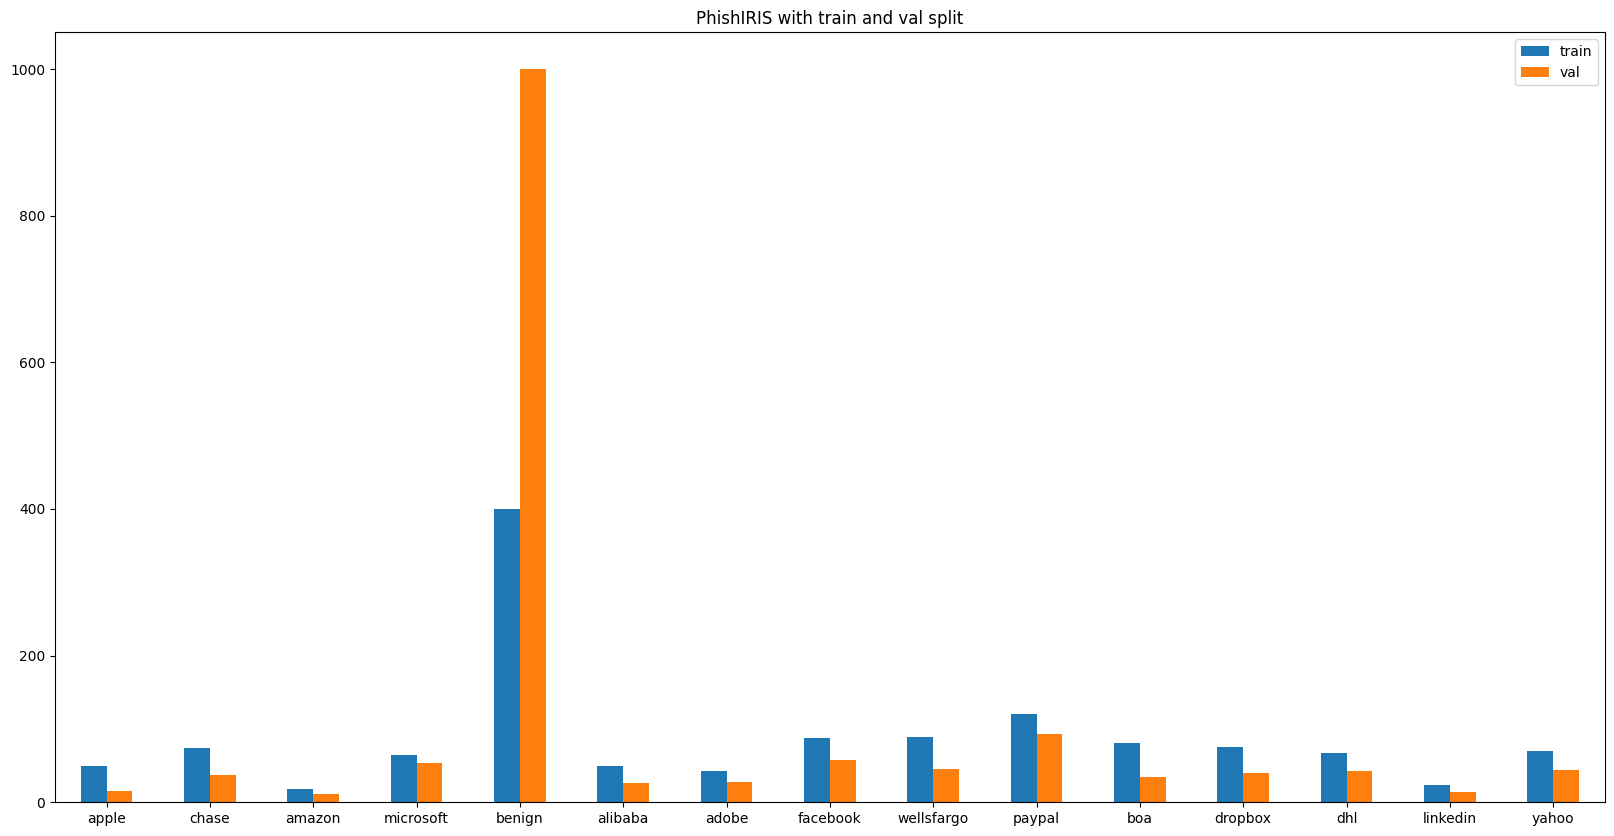

In [45]:
# split phishIRIS based on path if it contains train or val
phishIRIS["type"] = phishIRIS["path"].apply(
    lambda x: "train" if "train" in x else "val"
)
phishIRIS.replace("other", "benign", inplace=True)
phishIRIS.head()

data = {
    "train": phishIRIS[phishIRIS["type"] == "train"]["target"].value_counts(),
    "val": phishIRIS[phishIRIS["type"] == "val"]["target"].value_counts(),
}

df = pd.DataFrame(data, index=phishIRIS["target"].unique())
df.plot.bar(rot=0, figsize=(20, 10), title="PhishIRIS with train and val split")

In [57]:
df = pd.DataFrame(data, index=phishIRIS["target"].unique())
df["sum"] = df.sum(axis=1)
df

,train,val,sum
apple,49,15,64
chase,74,37,111
amazon,18,11,29
microsoft,65,53,118
benign,400,1000,1400
alibaba,50,26,76
adobe,43,27,70
facebook,87,57,144
wellsfargo,89,45,134
paypal,121,93,214


In [59]:
df.sum()

train    1313
val      1539
sum      2852
dtype: int64

### Phishpedia

In [48]:
no_benign, no_phish = (
    phishpedia_benign["target"].unique().shape,
    phishpedia_phish["target"].unique().shape,
)
print(f"Number of different targets in:\nbenign: {no_benign}\tphish: {no_phish}")

Number of different targets in:
benign: (30649,)	phish: (283,)


In [60]:
df = pd.DataFrame(
    {
        "phish": phishpedia_phish["target"].value_counts(),
        "benign": phishpedia_benign["target"].value_counts(),
    }
)

# df['phish'].sort_values(ascending=False)
phishpedia_phish.shape

(29496, 9)

In [69]:
phishpedia_phish["target"].value_counts().head(n=10)

target
Outlook                   4857
PayPal Inc.               4811
Office365                 2059
Chase Personal Banking    1085
Microsoft OneDrive        1046
Facebook, Inc.             993
Amazon.com Inc.            807
Netflix Inc.               747
DHL Airways, Inc.          727
Bank of America            653
Name: count, dtype: int64

#### Number of phishing targets with more than 100 sites

In [109]:
df3 = pd.DataFrame(phishpedia_phish["target"].value_counts())
df3[df3["count"] > 100].shape

(38, 1)

<Axes: xlabel='target'>

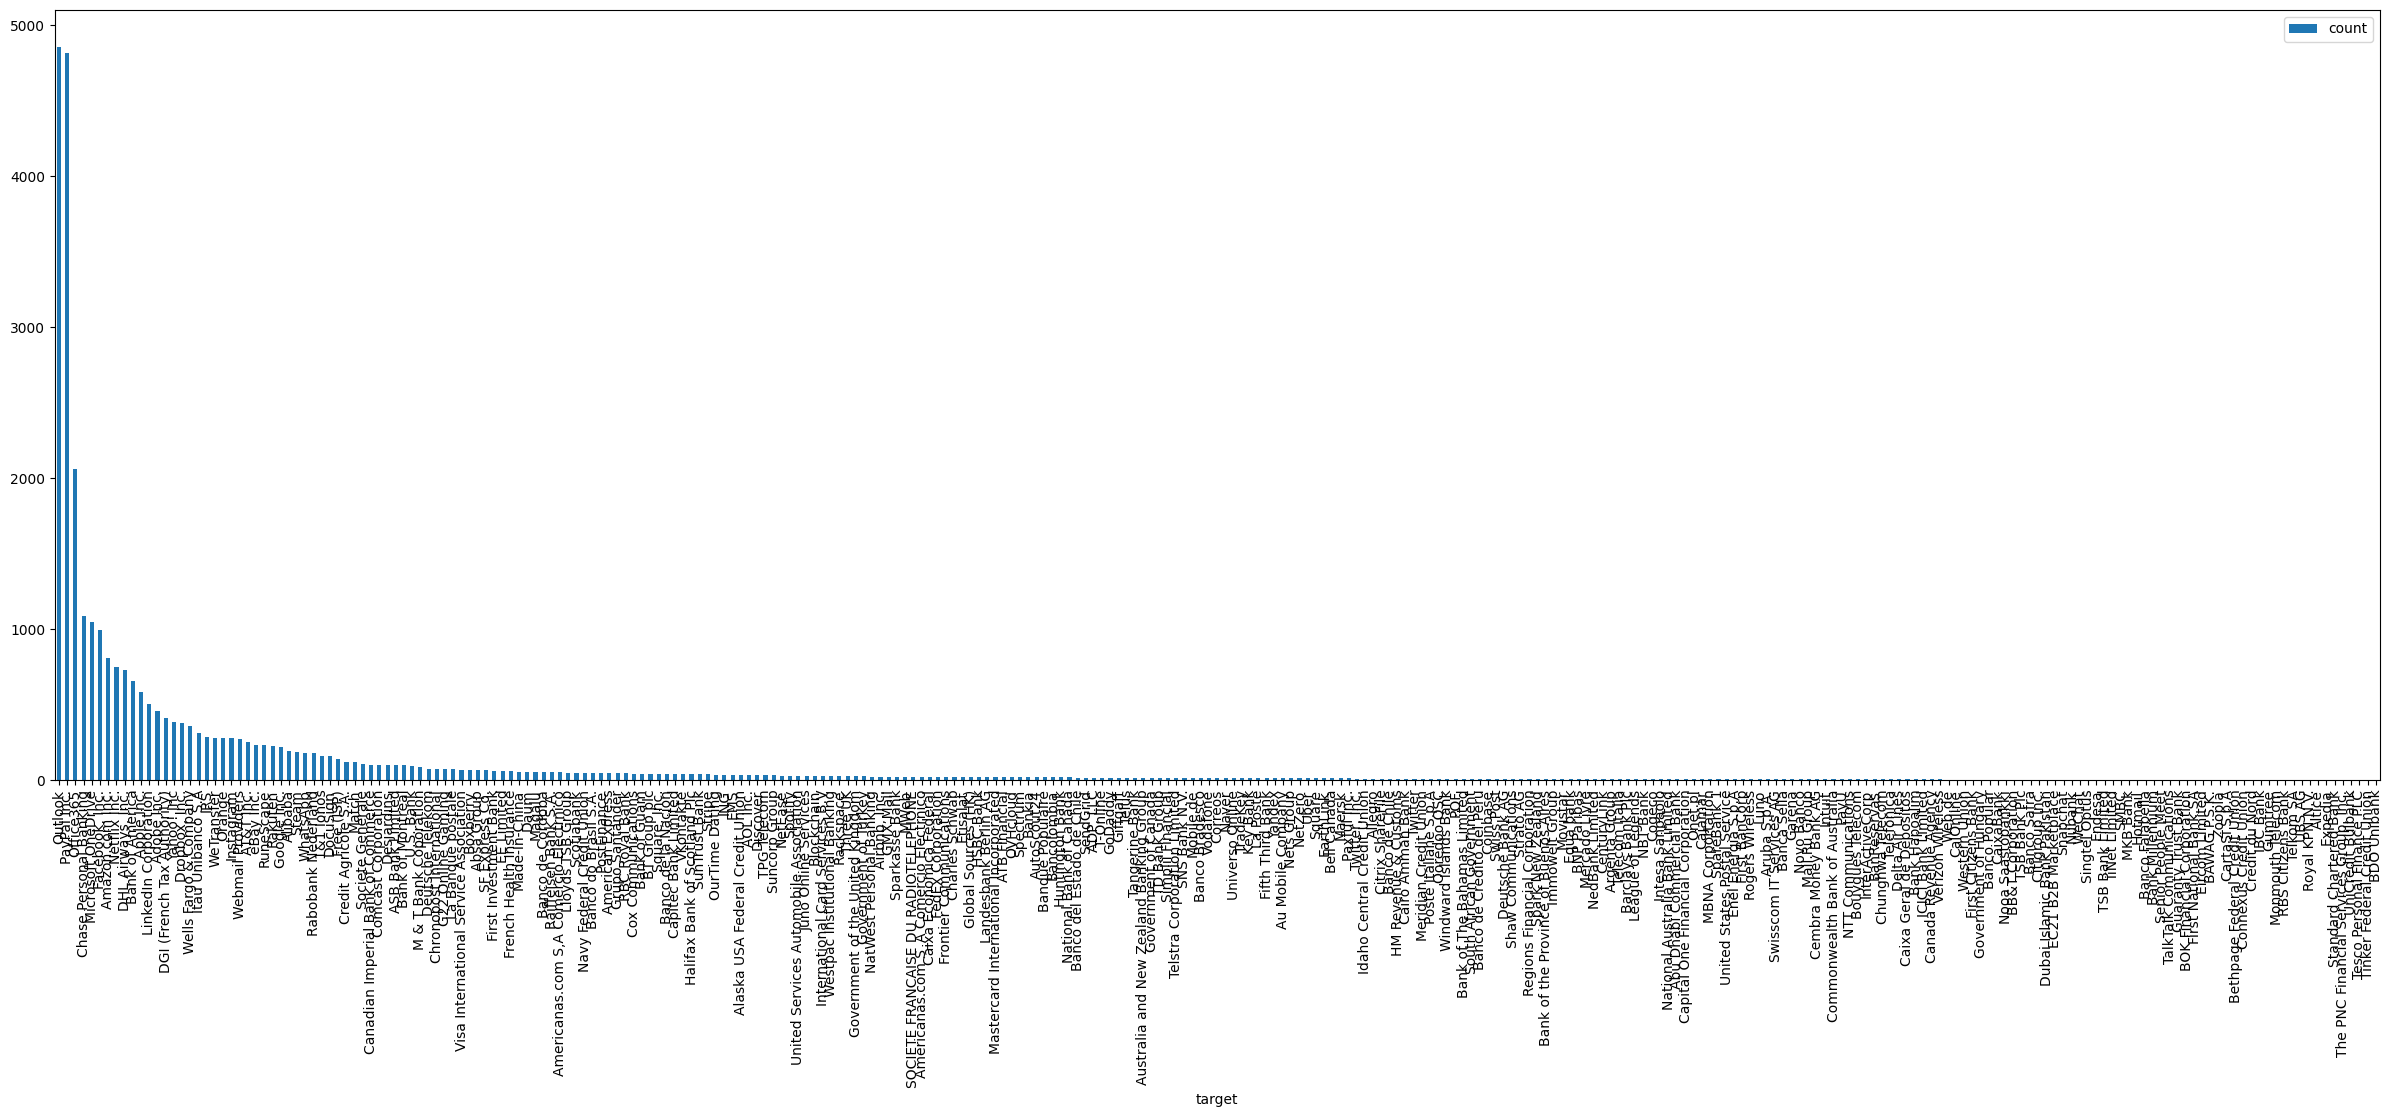

In [67]:
df2 = phishpedia_phish["target"].value_counts()
pd.DataFrame(df2).plot.bar(figsize=(30, 10))

<Axes: title={'center': 'Histogram of phishing targets occurrences in Phishpedia PHISH'}, ylabel='frequency'>

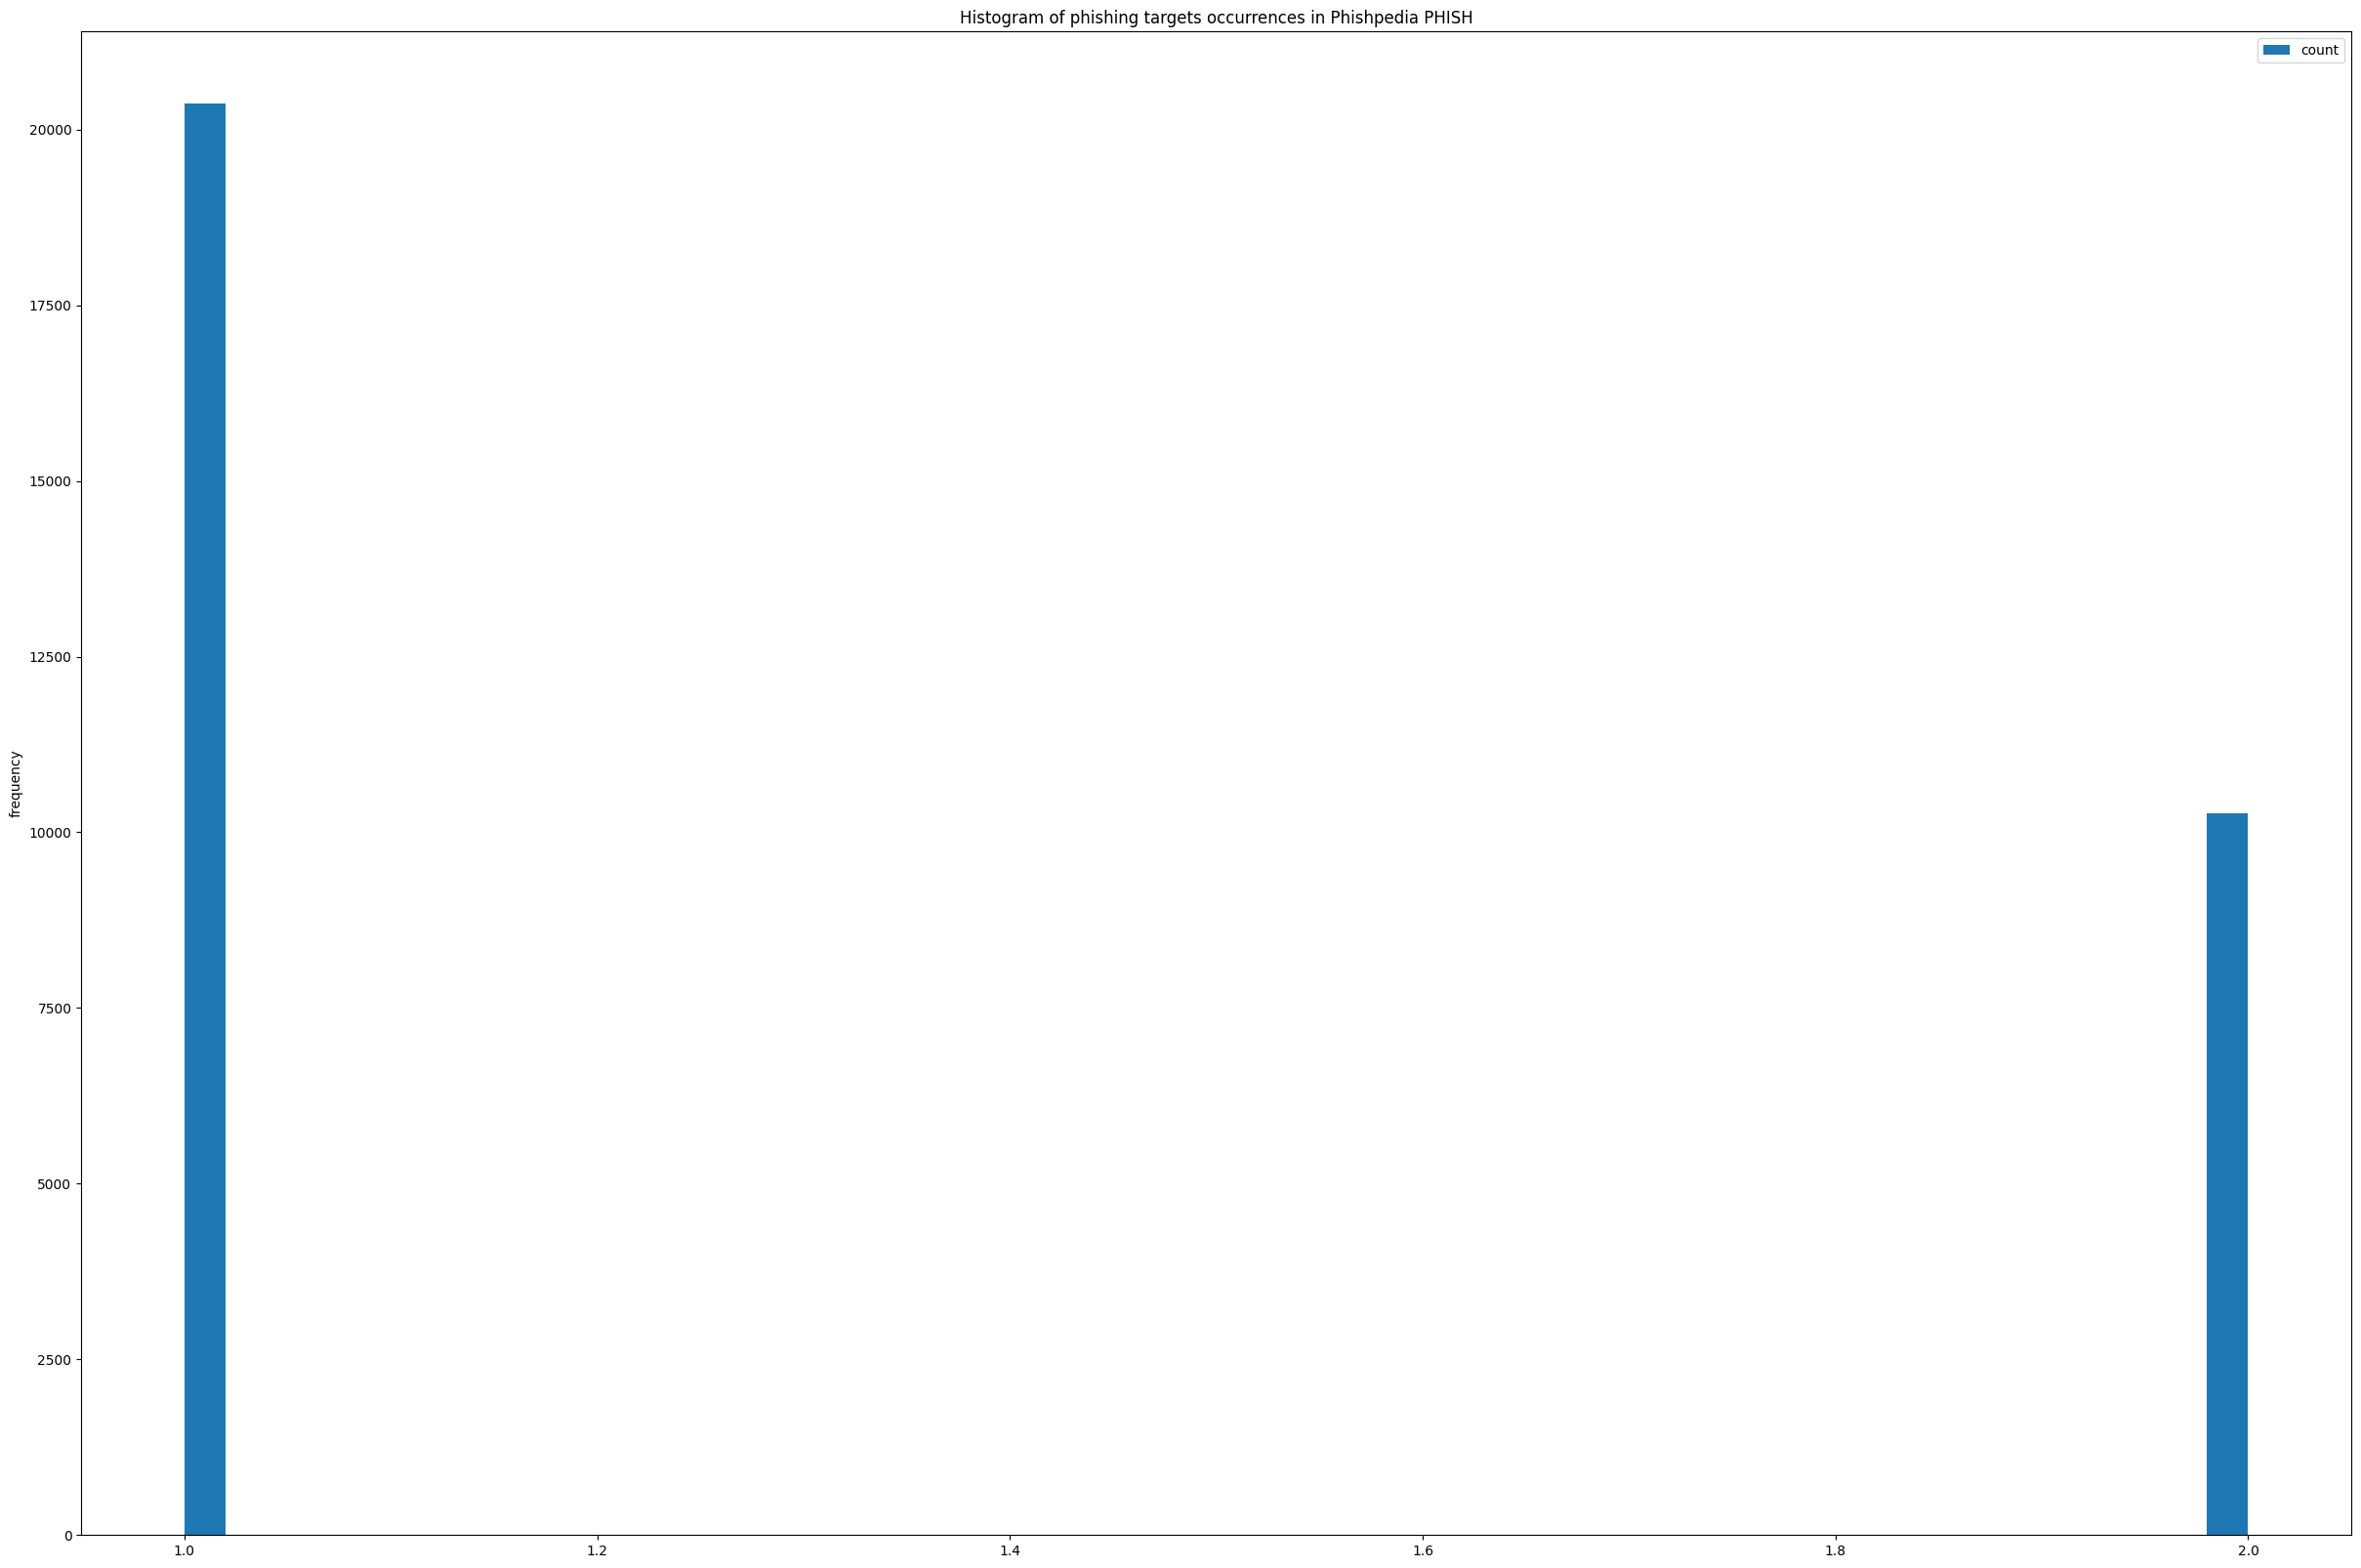

In [88]:
pd.DataFrame(df2).plot.hist(
    figsize=(30, 20),
    bins=50,
    ylabel="frequency",
    title="Histogram of phishing targets occurrences in Phishpedia PHISH",
)

In [84]:
df["benign"].sort_values(ascending=False).head(n=20)

target
zzz.sk                     2.0
the-priory.com             2.0
theceshop.com              2.0
thecerealschool.com        2.0
thebusinessplanshop.com    2.0
thebushcraftstore.co.uk    2.0
theboyz.jp                 2.0
thebarefootwriter.com      2.0
theastrocodex.com          2.0
theartofbooks.com          2.0
theartnewspaper.com        2.0
the-jibatsu.work           2.0
thechinatownmarket.com     2.0
the-gadgeteer.com          2.0
the-ascott.com             2.0
the-ambient.com            2.0
thansen.dk                 2.0
thanksgivingpoint.org      2.0
thalia.at                  2.0
thairoute.com              2.0
Name: benign, dtype: float64

<Axes: title={'center': 'Histogram of phishing targets occurrences in Phishpedia BENIGN dataset'}, ylabel='frequency'>

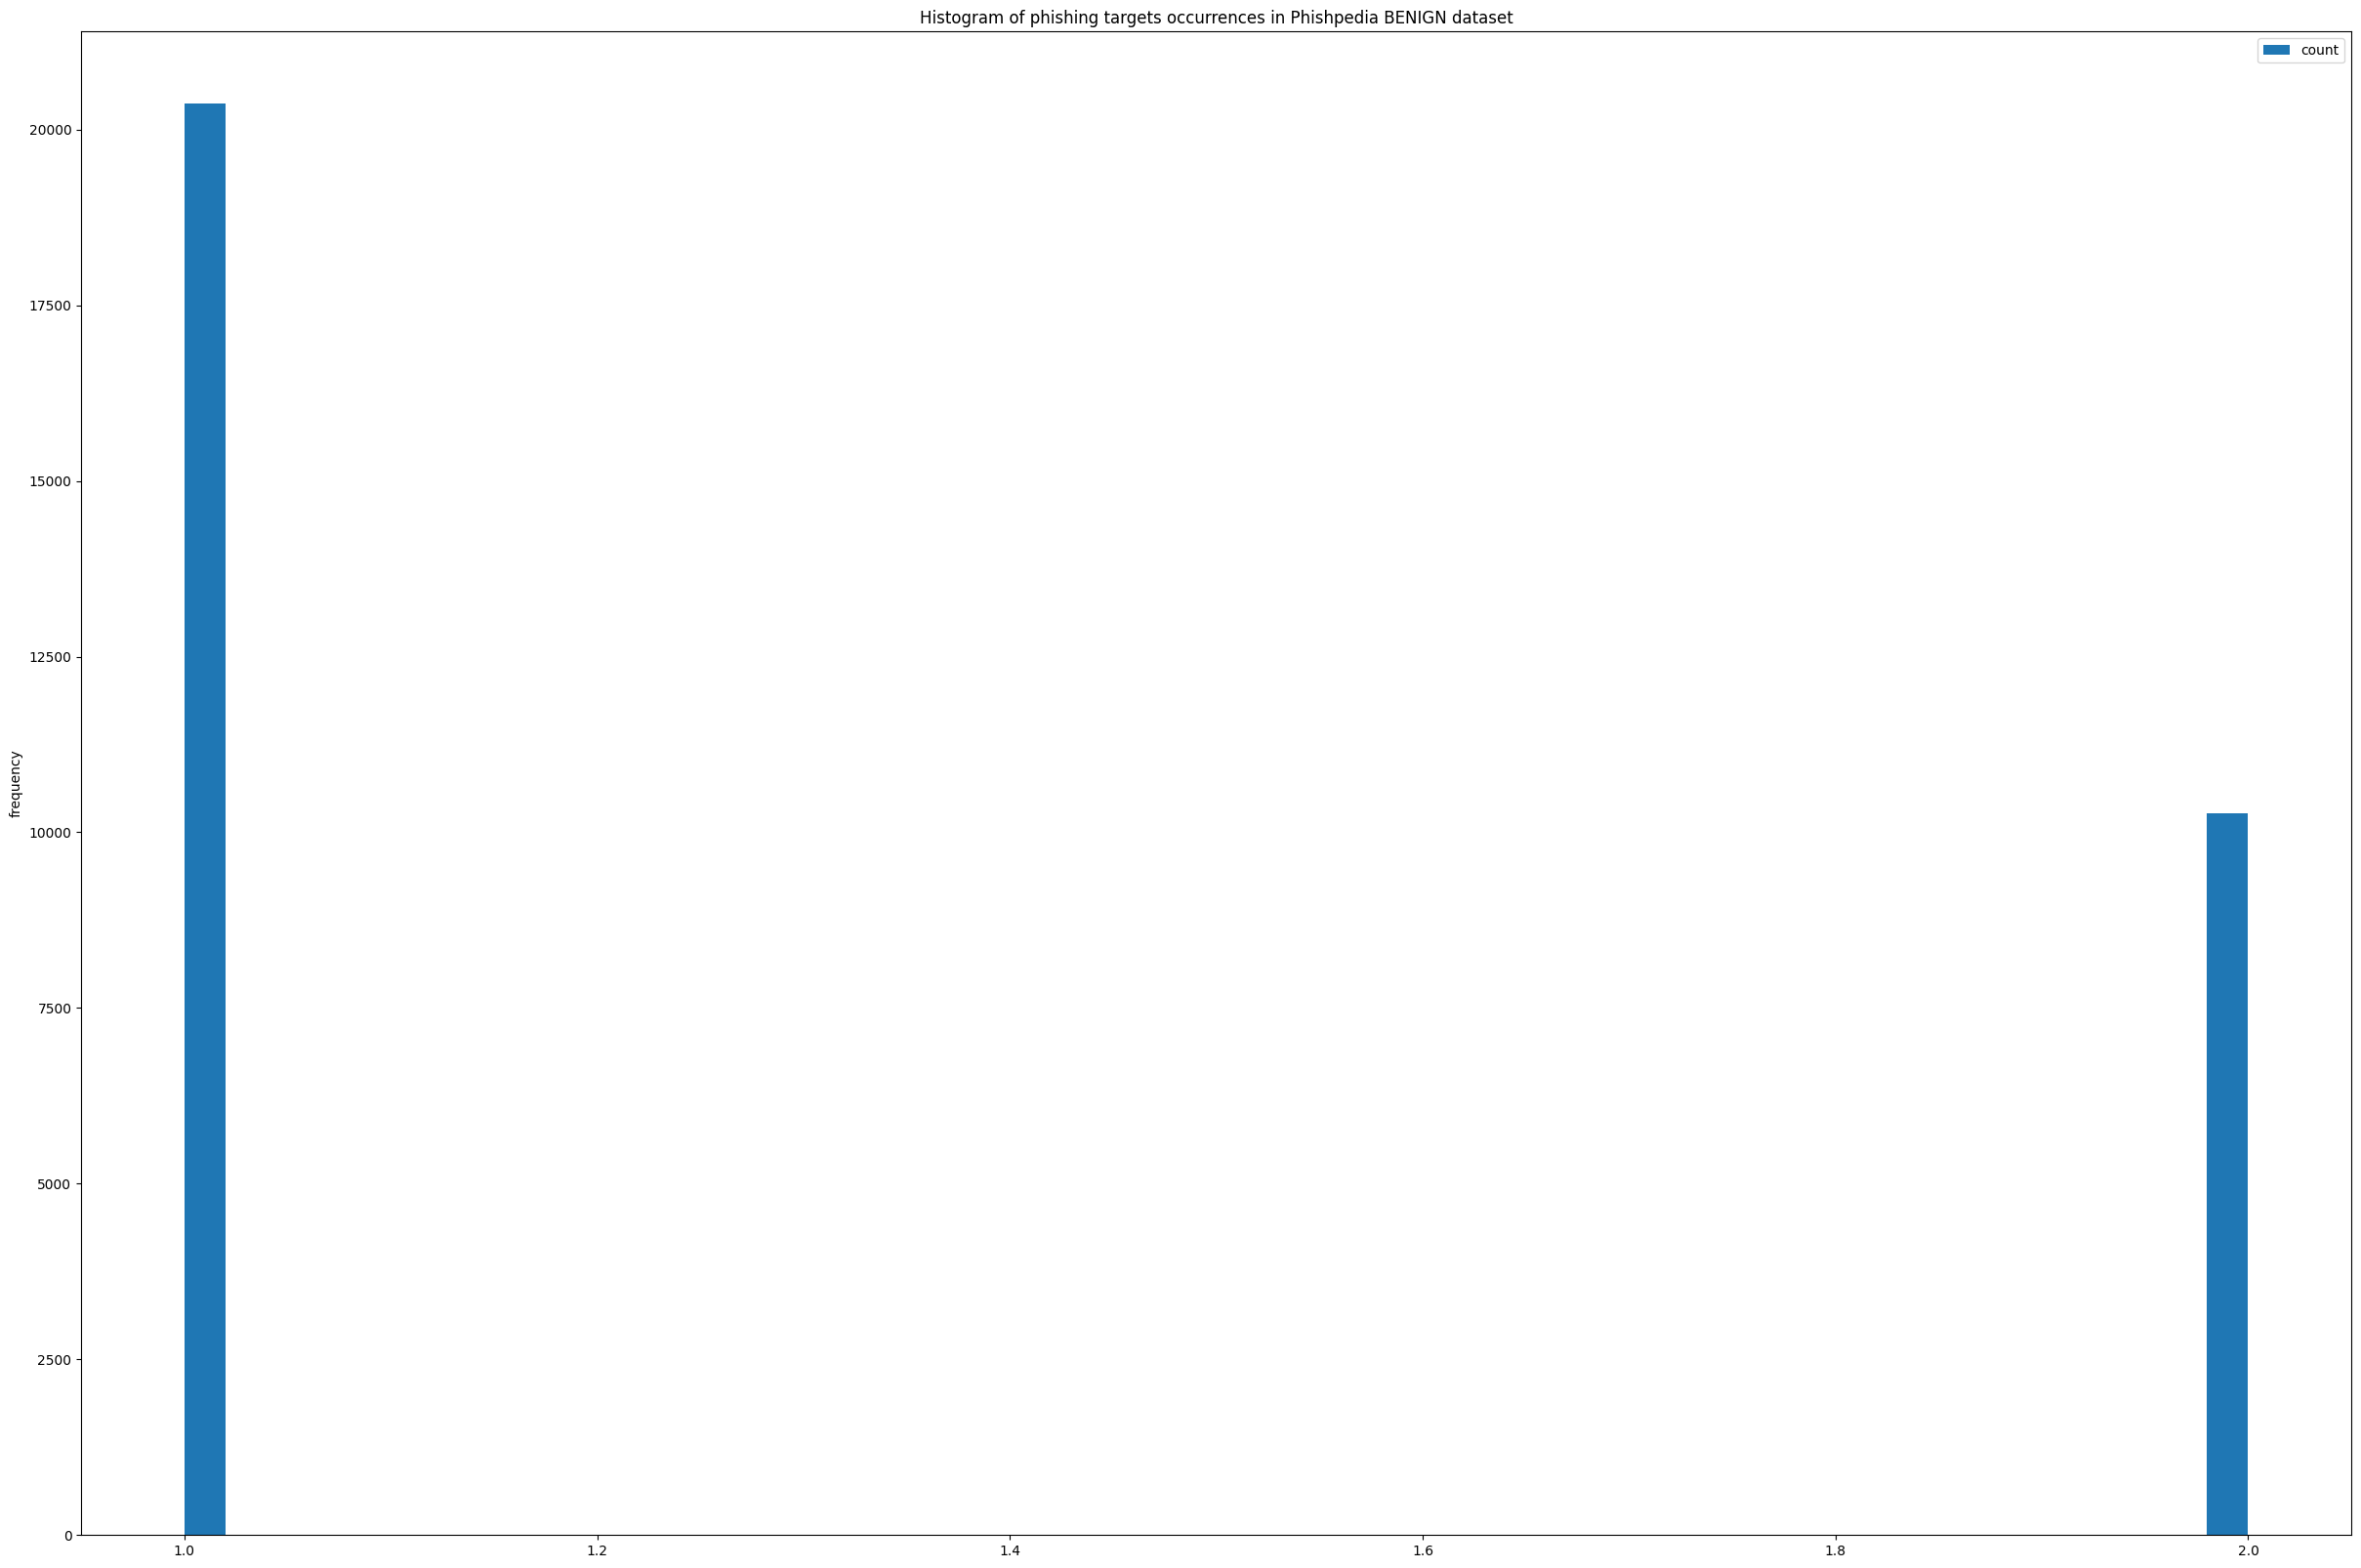

In [87]:
df2 = phishpedia_benign["target"].value_counts()
pd.DataFrame(df2).plot.hist(
    figsize=(30, 20),
    bins=50,
    ylabel="frequency",
    title="Histogram of phishing targets occurrences in Phishpedia BENIGN dataset",
)

In [ ]:
summary, common = compare_targets(phishpedia_benign, phishpedia_phish)

#### Number of unique benign and phish targets

In [30]:
phishpedia_benign["target"].unique().shape, phishpedia_phish["target"].unique().shape

((30649,), (283,))

#### Number of common targets

In [31]:
summary[summary["status"] == "common"].sort_values(
    by="target", key=lambda col: col.str.lower()
)

,target,status
0,onet.pl,common


### VisualPhish

In [7]:
visualphish_phish["target"].unique()
# join with phishpedia phishing
df = pd.merge(
    visualphish_benign["target"], phishpedia_phish["target"], on="target", how="outer"
)
df["target"].unique().shape

(438,)

In [10]:
# only levenshtein_distance -> (39, 2)
summary, common = compare_targets(visualphish_phish, phishpedia_phish)
common.shape

(39, 2)

In [12]:
# levenshtein_distance and manual correction -> (71, 2)
summary, common = compare_targets(visualphish_phish, phishpedia_phish)
common.shape

(71, 2)

In [13]:
phishpedia_phish["target"].unique().shape

(283,)

In [28]:
# it should sort by lowercased target
summary[summary["status"] != "common"].sort_values(
    by="target", key=lambda col: col.str.lower()
)

,target,status
252,1&1 Ionos,only_in_b
343,Abu Dhabi Commercial Bank,only_in_b
81,adidas,only_in_a
162,"ADP, LLC",only_in_b
198,Alaska USA Federal Credit Union,only_in_b
...,...,...
337,Yandex,only_in_b
120,youtube,only_in_a
132,ziggo,only_in_a
116,zoominfo,only_in_a
